In [12]:
import numpy as np
import matplotlib.pyplot as plt

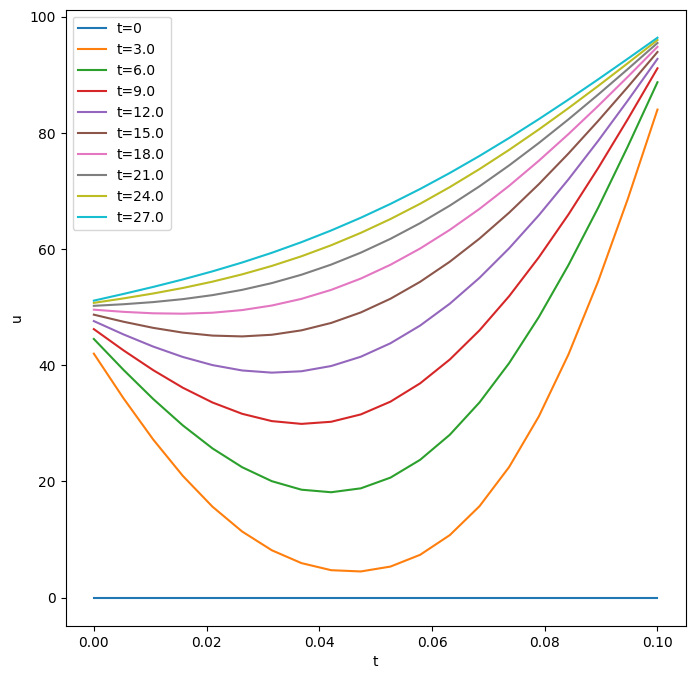

In [8]:
#유한 요소법 구현해볼 것임

# space domain
L = 0.1
n = 20
dx = L/n
u0 = 0.0 # initial condition
u1s = 50.0 # boundary condition 1
u2s = 100.0 # boundary condition 2
#initial value를 array로 만들겠다
x = np.linspace(0, L, n) # u라는 것은 x에 대응하는 물리량이니 x 값도 만들어주겠음
u = np.zeros(n) + u0 # 다른 값들이 array이니, u도 array로 만들어주겠음
 
alpha = 0.0001 #coefficient

# time domain
dt = 0.1
t_final = 30.0
t = np.arange(0, t_final, dt)

figure = plt.figure(figsize=(8,8))
plt.plot(x, u, label='t=0')

dudt = np.zeros(n)

# i: space index
# j: time index

for j in range(1, len(t)): # j=0일 때의 값, 즉 u0은 이미 위에서 지정했기에 1부터 시작
    for i in range(1, n-1): # i=0일 때의 값: u1s, i=n-1일 때의 값: u2s, 위에서 이미 지정함.
        dudt[i] = alpha*((-(u[i]-u[i-1])/dx**2.0) + ((u[i+1]-u[i])/dx**2.0))
    
    dudt[0] = alpha*((-(u[0]-u1s)/dx**2.0) + ((u[1]-u[0])/dx**2.0)) # i=0
    dudt[n-1] = alpha*((-(u[n-1]-u[n-2])/dx**2.0) + ((u2s-u[n-1])/dx**2.0)) #i=n-1
    
    u = u + dudt*dt
    tnow = j*dt
    if((j%30)==0):
        plt.plot(x, u, label='t='+str(tnow))
        plt.xlabel('t')
        plt.ylabel('u')

plt.legend()


실습

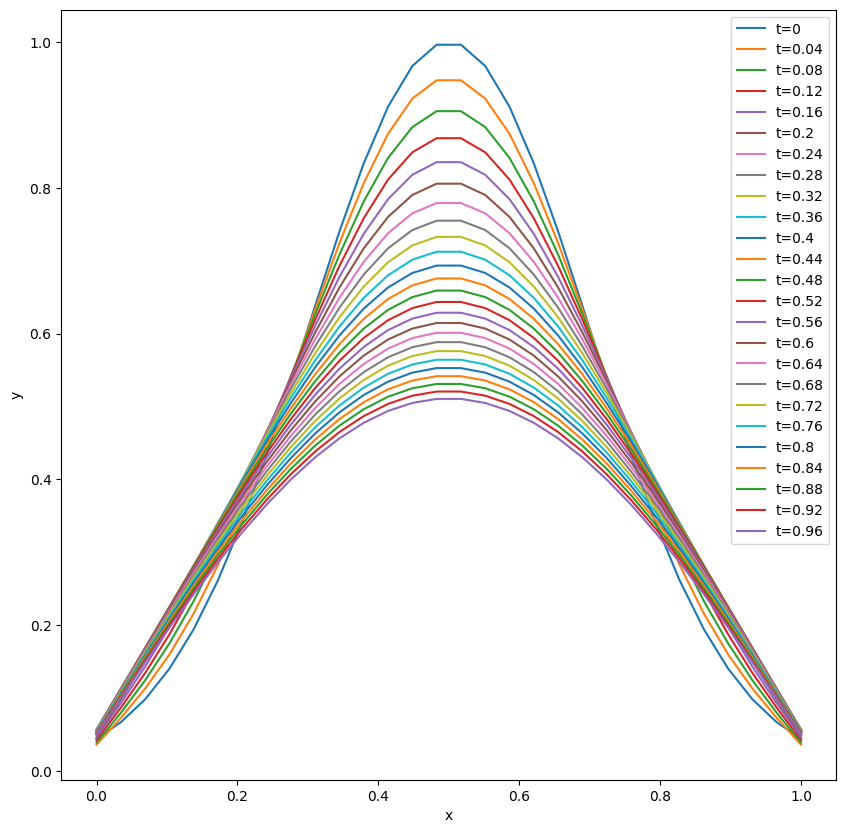

In [9]:
#1.

#space-domain
L = 1.0
n = 30
dx = L/n
u0 = 0.0 #initial condition
u1s = 0.0 #boundary condition 1
u2s = 0.0 #boundary condition 2
sigma = 0.2
x = np.linspace(0, L, n)
u = np.exp((-(x-(L/2))**2.0)/(2.0*sigma**2.0))

alpha = 0.05
#time-domain
dt = 0.001
t_final = 1.0
t = np.arange(0, t_final, dt)

figure = plt.figure(figsize=(10,10))
plt.plot(x, u, label='t=0')
plt.legend()

dudt = np.zeros(n)

#i: space index
#j: time index

for j in range(1, len(t)):
    for i in range(1, n-1):
        dudt[i] = alpha*(-(u[i]-u[i-1])/dx**2.0 + (u[i+1]-u[i])/dx**2.0)

    dudt[0] = alpha*(-(u[0]-u1s)/dx**2.0 + (u[1]-u[0])/dx**2.0) #i==0
    dudt[n-1] = alpha*(-(u[n-1]-u[n-2])/dx**2.0 + (u2s-u[n-1])/dx**2.0) #i=n-1

    u = u + dudt*dt
    tnow = j*dt

    if ((j%40) == 0):
        plt.plot(x, u, label='t='+str(tnow))
        plt.xlabel('x')
        plt.ylabel('y')

plt.legend()

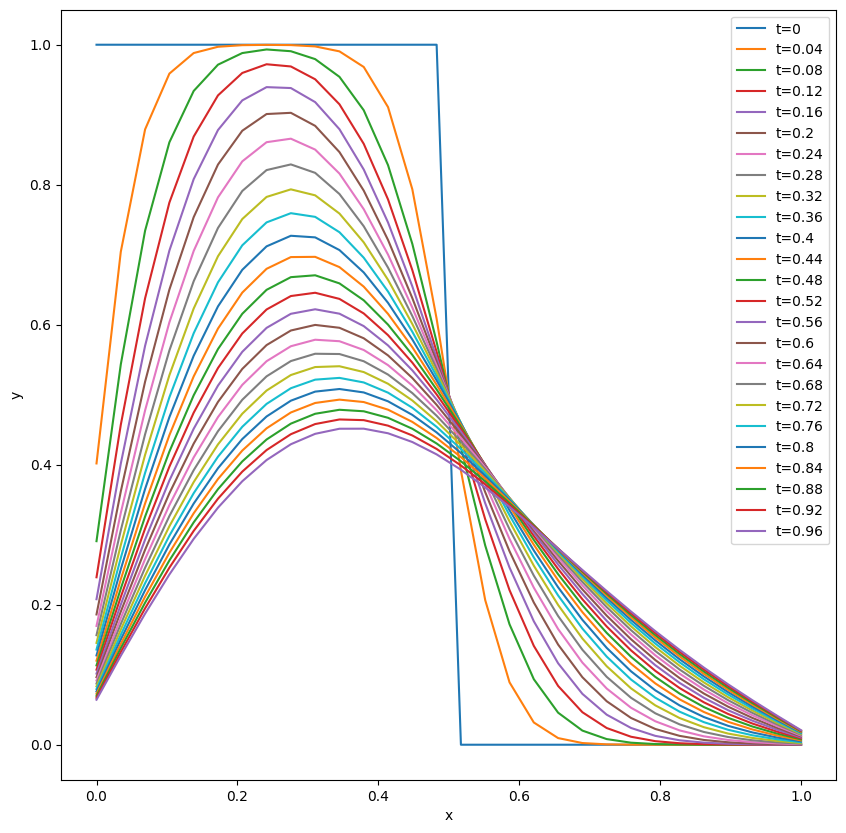

In [10]:
#2.

#space-domain
L = 1.0
n = 30
dx = L/n
u0 = 0.0 #initial condition
u1s = 0.0 #boundary condition 1
u2s = 0.0 #boundary condition 2
sigma = 0.2
x = np.linspace(0, L, n)
u = np.exp((-(x-(L/2))**2.0)/(2.0*sigma**2.0))

index = np.where(x>0.5)
u = np.ones(n)
u[index] = 0

alpha = 0.05
#time-domain
dt = 0.001
t_final = 1.0
t = np.arange(0, t_final, dt)

figure = plt.figure(figsize=(10,10))
plt.plot(x, u, label='t=0')
plt.legend()

dudt = np.zeros(n)

#i: space index
#j: time index

for j in range(1, len(t)):
    for i in range(1, n-1):
        dudt[i] = alpha*(-(u[i]-u[i-1])/dx**2.0 + (u[i+1]-u[i])/dx**2.0)

    dudt[0] = alpha*(-(u[0]-u1s)/dx**2.0 + (u[1]-u[0])/dx**2.0) #i==0
    dudt[n-1] = alpha*(-(u[n-1]-u[n-2])/dx**2.0 + (u2s-u[n-1])/dx**2.0) #i=n-1

    u = u + dudt*dt
    tnow = j*dt

    if ((j%40) == 0):
        plt.plot(x, u, label='t='+str(tnow))
        plt.xlabel('x')
        plt.ylabel('y')

plt.legend()

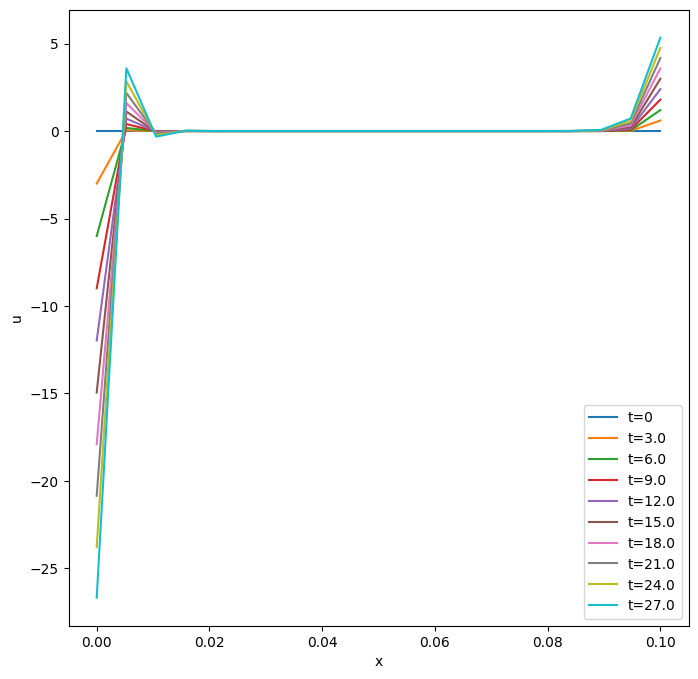

In [11]:
#space-domain
L = 0.1
n = 20
dx = L/n
u0 = 0.0 #initial condition
u1s = 100.0 #boundary condition 1
u2s = 20.0 #boundary condition 2
x = np.linspace(0, L, n)
u = np.zeros(n) + u0

alpha = 0.0001

#time-domain
dt = 0.1
t_final = 30.0
t = np.arange(0, t_final, dt)

figure = plt.figure(figsize=(8,8))
plt.plot(x, u, label='t=0')
plt.legend()

dudx = np.zeros(n)

#i: space index
#j: time index

for j in range(1, len(t)):
    for i in range(1, n-1):
        dudx[i] = (u[i+1]-u[i-1])/(2.0*dx)

    dudx[0] = (u[1]-u1s)/(2.0*dx)
    dudx[n-1] = (u2s-u[n-2])/(2.0*dx)
    dudt = alpha*dudx
    
    u = u + dudt*dt
    tnow = j*dt

    if ((j%30) == 0):
        plt.plot(x, u, label='t='+str(tnow))
        plt.xlabel('x')
        plt.ylabel('u')

plt.legend()